In [ ]:
import numpy as np
import pandas as pd
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
import seaborn as sns
import re
from pmdarima.arima import auto_arima
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.dates as mdates
from collections import defaultdict
import ipaddress
import socket, struct
from hilbertcurve.hilbertcurve import HilbertCurve
import pandas as pd
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from scipy.stats import entropy
from multiprocessing import Pool
import hdbscan
from sklearn.neighbors import NearestNeighbors
import math
from collections import Counter
sns.set()

In [2]:
import pandas as pd
file = '/Volumes/BlackHole/caida/ddostrace.to-victim.20070804_142436/conn.log'
from zat.log_to_dataframe import LogToDataFrame
log_to_df = LogToDataFrame()
zeek_df = log_to_df.create_dataframe(file,usecols=['ts','id.orig_h'])
pd.set_option('display.max_columns', None)
zeek_df

,id.orig_h
ts,
2007-08-04 21:24:36.599430912,199.184.102.10
2007-08-04 21:24:36.601337856,199.184.102.10
2007-08-04 21:24:37.745654016,197.208.124.44
2007-08-04 21:24:38.229428992,200.227.110.2
2007-08-04 21:24:38.240567808,197.208.124.44
...,...
2007-08-04 21:24:36.492600064,125.86.157.236
2007-08-04 21:24:36.502681856,194.137.253.181
2007-08-04 21:24:36.702683904,203.170.244.203


In [3]:
zeek_df.rename(columns={'id.orig_h':'Src IP'},inplace=True)

In [4]:
ts_df = zeek_df['Src IP'].resample('1S').count()

In [5]:
def plot_ts(df):
  fig, ax = plt.subplots(figsize=(15, 6))
  ax.plot(df.index, df.values)
  ax.set_xlabel('Time')
  ax.set_ylabel('Frequency')
  plt.show()

In [6]:
def plot_ips(df):
    # compute IP address frequency counts
    ip_counts = df['Src IP'].value_counts()
    fig = plt.figure(figsize=(15, 10))
    plt.bar(ip_counts.index, np.log10(ip_counts.values), width=0.5)
    plt.xticks(np.arange(len(ip_counts.index)), ip_counts.index, rotation=90, fontsize=6)
    plt.xlabel('IP Address Type')
    plt.ylabel('Log Frequency')
    plt.title('Frequency of Source IP Addresses')
    plt.show()

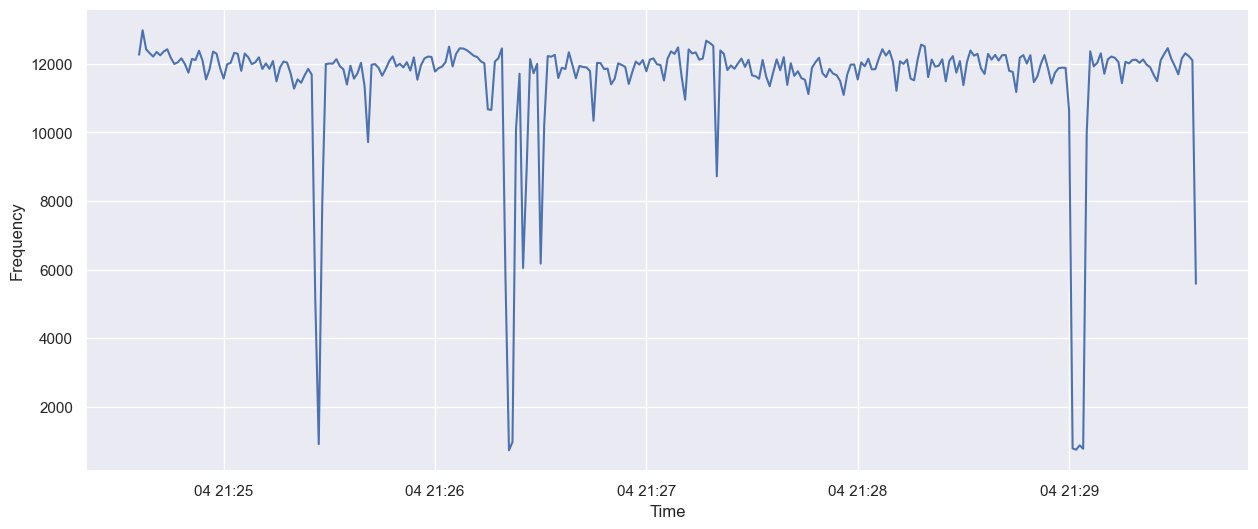

In [7]:
plot_ts(ts_df)

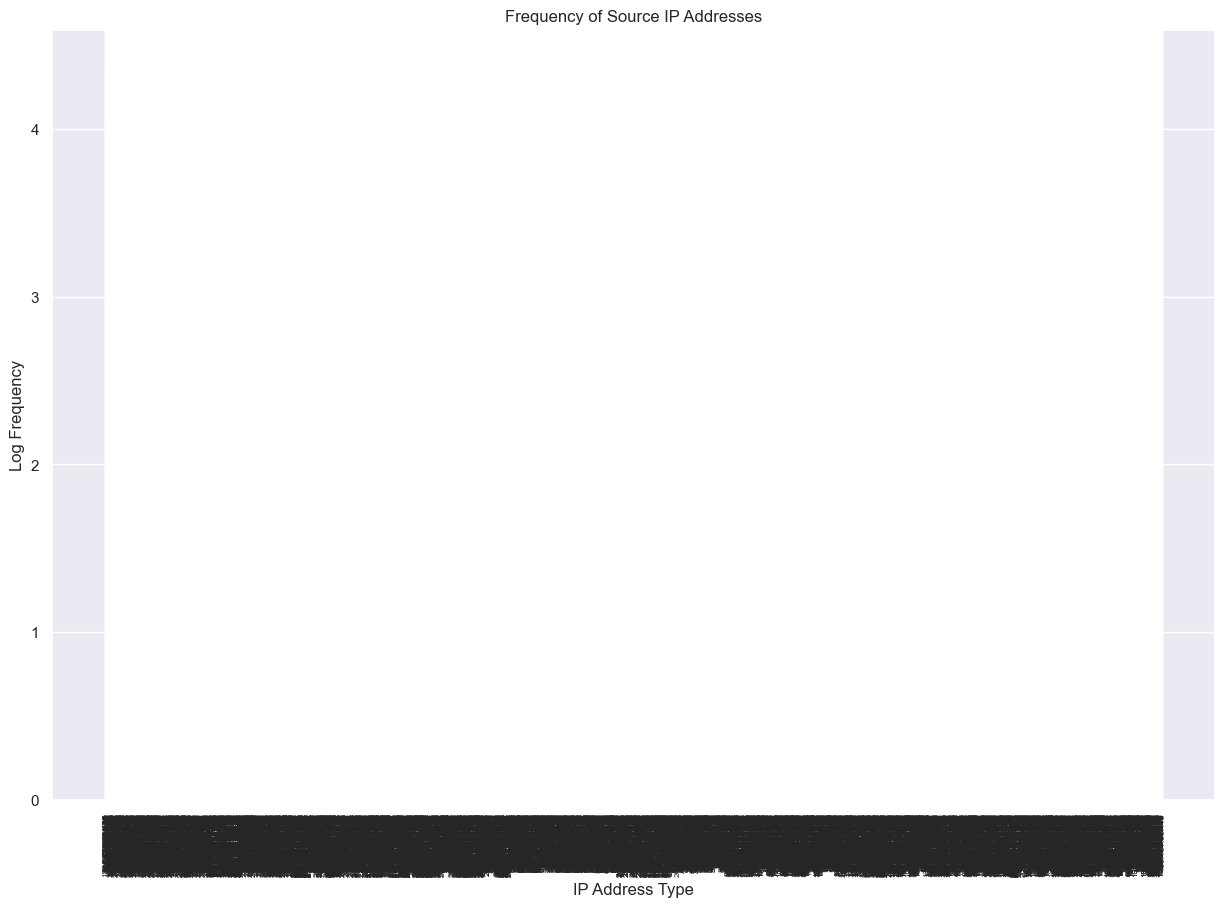

In [8]:
plot_ips(zeek_df)

In [9]:
timeseries_df = ts_df 
model = auto_arima(timeseries_df, start_p=0, start_q=0, max_p=3, max_q=3, d=None,
                   seasonal=False, stepwise=True, suppress_warnings=True, error_action="ignore",
                   trace=True, scoring='mse')
model.summary()

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=6494.971, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=inf, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=6116.575, Time=0.04 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=5270.904, Time=0.01 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=5260.915, Time=0.04 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=5272.954, Time=0.01 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=inf, Time=0.11 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=inf, Time=0.10 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=5231.986, Time=0.04 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=5861.140, Time=0.05 sec
 ARIMA(1,0,3)(0,0,0)[0]             : AIC=inf, Time=0.08 sec
 ARIMA(0,0,3)(0,0,0)[0]             : AIC=inf, Time=0.07 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=inf, Time=0.12 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=5200.506, Time=0.03 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=5208.765, Time=0.04 s

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  301
Model:               SARIMAX(0, 0, 3)   Log Likelihood               -2594.213
Date:                Wed, 26 Apr 2023   AIC                           5198.425
Time:                        21:23:16   BIC                           5216.961
Sample:                    08-04-2007   HQIC                          5205.842
                         - 08-04-2007                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   1.142e+04    351.946     32.458      0.000    1.07e+04    1.21e+04
ma.L1          0.9295      0.036     26.080      0.000       0.860       0.999
ma.L2          0.4377      0.043     10.130      0.000       0.353       0.522
ma.L3          0.1987      0.037      5.397      0.000       0.127       0.271
sigma2      1.787e+06   6.82e+04     26.198      0.000    1.65e+06    1.92e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              4196.16
Prob(Q):                              1.00   Prob(JB):                         0.00
Heteroskedasticity (H):               2.13   Skew:                            -2.92
Prob(H) (two-sided):                  0.00   Kurtosis:                        20.33
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

/opt/homebrew/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.07861D+01    |proj g|=  1.02894D+00

At iterate    5    f=  1.03073D+01    |proj g|=  2.39452D-03

At iterate   10    f=  1.03070D+01    |proj g|=  8.10379D-05

At iterate   15    f=  1.03069D+01    |proj g|=  1.45653D-03

At iterate   20    f=  1.03009D+01    |proj g|=  9.18474D-03

At iterate   25    f=  9.74613D+00    |proj g|=  2.47959D-02

At iterate   30    f=  9.69176D+00    |proj g|=  1.45888D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nac

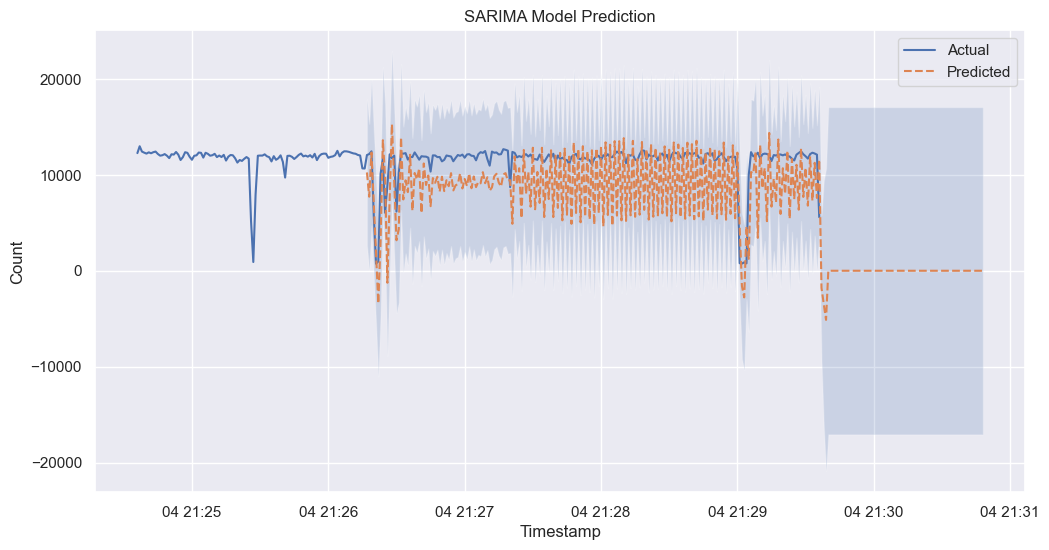

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm



# create a SARIMA model with (p, d, q) = (1, 1, 1) and (P, D, Q, s) = (0, 1, 1, 60)
model = sm.tsa.statespace.SARIMAX(timeseries_df, order=(0, 0, 3))
df_ts = timeseries_df
results = model.fit()

# predict the values for the next hour
pred = results.get_prediction(start=df_ts.index[-200], end=df_ts.index[-1] + pd.Timedelta(hours=0.02), dynamic=False)

# extract the predicted values, the lower and upper confidence intervals
pred_mean = pred.predicted_mean
pred_ci = pred.conf_int()

# plot the actual values, the predicted values, and the error margins
fig, ax = plt.subplots(figsize=(12, 6))

# plot the actual values
ax.plot(df_ts.index, df_ts, label='Actual')

# plot the predicted values
ax.plot(pred_mean.index, pred_mean, label='Predicted', linestyle='--')

# plot the error margins
ax.fill_between(pred_ci.index, pred_ci.iloc[:, 0], pred_ci.iloc[:, 1], alpha=0.2)

# set the axis labels and title
ax.set_xlabel('Timestamp')
ax.set_ylabel('Count')
ax.set_title('SARIMA Model Prediction')

# show the legend
ax.legend()

plt.show()


In [11]:
def convert_ip_to_int2(ip):
    # Convert the IP address to an integer
    ip_int = int(ipaddress.IPv4Address(ip_str))

    # Convert each integer part of the IP address to a binary string and concatenate them
    ip_parts = (ip_int >> 24, (ip_int >> 16) & 255, (ip_int >> 8) & 255, ip_int & 255)
    binary_str = ''.join(format(p, '08b') for p in ip_parts)

    # Convert each integer part of the IP address to a binary string and concatenate them
    ip_parts = (ip_int >> 24, (ip_int >> 16) & 255, (ip_int >> 8) & 255, ip_int & 255)
    binary_str = ''.join(format(p, '08b') for p in ip_parts)

    # Convert the binary string to a 128-bit integer
    ip_int128 = int(binary_str, 2)
    return ip_int128

def convert_ip_to_int(ip):
    return struct.unpack("!I", socket.inet_aton(ip))[0]

def convert_ip_to_hc_coord(ips):
    ip_to_hc = defaultdict(list)
    hc_to_ip = defaultdict(list)
    
        
    set_ips = set(ips)
    
    map_ips = {}
    for i,ip in enumerate(set_ips):
        val = convert_ip_to_int(ip)
        map_ips[val] = i
    coords = []    
    n = 2
    bits = 64
    # Compute the Hilbert coordinate for the 128-bit integer
    hc = HilbertCurve(bits, n, n_procs=-1)
    coords_set = hc.points_from_distances(map_ips.keys())
    
    coords = []
    for ip in ips:
        int_ip = convert_ip_to_int(ip)
        index = map_ips[int_ip]
        coord = coords_set[index]
        coords.append(coord)
    return coords
df = zeek_df
coords = convert_ip_to_hc_coord(df['Src IP'])
df['Coords'] = coords

In [12]:
df.head()

,Src IP,Coords
ts,,
2007-08-04 21:24:36.599430912,199.184.102.10,"[59660, 23980]"
2007-08-04 21:24:36.601337856,199.184.102.10,"[59660, 23980]"
2007-08-04 21:24:37.745654016,197.208.124.44,"[62597, 18535]"
2007-08-04 21:24:38.229428992,200.227.110.2,"[56465, 21809]"
2007-08-04 21:24:38.240567808,197.208.124.44,"[62597, 18535]"


In [13]:
# table.head()

In [14]:
# freq_table = x['Src IP'].value_counts()

In [15]:
# freq_table

In [16]:
# # Find the maximum value (1% percentile) and minimum value (1) in the freq_table
# max_value = freq_table.quantile(0.7)
# min_value = freq_table.quantile(0.01)

# # Create two sub-tables based on the maximum and minimum values
# top_ips = filtered_df[filtered_df['Src IP'].isin(freq_table[freq_table >= max_value].index)]
# bottom_ips = filtered_df[filtered_df['Src IP'].isin(freq_table[freq_table <= min_value].index)]

# # Group the sub-tables by timestamp and calculate the IP address count for each group
# top_ips_count = top_ips.groupby('Timestamp')['Src IP'].nunique()
# bottom_ips_count = bottom_ips.groupby('Timestamp')['Src IP'].nunique() 

 
# print('Max top IPS found', top_ips)    
    
# # Plot the IP address count over time for the top and bottom sub-tables
# plt.figure(figsize=(15, 5))
# plt.plot(top_ips_count.index, top_ips_count.values, label='Top IPs')
# plt.plot(bottom_ips_count.index, bottom_ips_count.values, label='Bottom IPs')
# plt.title('IP Address Count over Time for Top and Bottom Sub-Tables')
# plt.xlabel('Timestamp')
# plt.ylabel('IP Address Count')
# plt.legend()
# plt.show()

In [17]:
# # Define a function to calculate entropy
# def entropy_fn(data):
#     p_data = data.value_counts() / len(data) # calculate the probabilities
#     e = entropy(p_data)  # calculate entropy
#     return e

# # Calculate the entropy of the top_ips and bottom_ips sub-tables over time
# top_ips_entropy = top_ips.groupby('Timestamp')['Src IP'].apply(entropy_fn)
# bottom_ips_entropy = bottom_ips.groupby('Timestamp')['Src IP'].apply(entropy_fn)


# # Create a figure with two subplots, one for entropy and one for IP address count
# fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(15,10))

# # Plot the entropy over time for the top and bottom sub-tables on the first subplot
# ax1.plot(top_ips_entropy.index, top_ips_entropy.values, label='Top IPs', color='blue')
# ax1.plot(bottom_ips_entropy.index, bottom_ips_entropy.values, label='Bottom IPs', color='orange')
# ax1.set_xlabel('Timestamp')
# ax1.set_ylabel('Entropy')
# ax1.tick_params(axis='y')
# ax1.legend(loc='upper left')
# ax1.set_title('Entropy over Time for Top and Bottom Sub-Tables')

# # Group the sub-tables by timestamp and calculate the IP address count for each group
# top_ips_count = top_ips.groupby('Timestamp')['Src IP'].nunique()
# bottom_ips_count = bottom_ips.groupby('Timestamp')['Src IP'].nunique()

# # Plot the IP address count over time for the top and bottom sub-tables on the second subplot
# ax2.plot(top_ips_count.index, top_ips_count.values, label='Top IPs Count', color='blue', linestyle='--')
# ax2.plot(bottom_ips_count.index, bottom_ips_count.values, label='Bottom IPs Count', color='orange', linestyle='--')
# ax2.set_xlabel('Timestamp')
# ax2.set_ylabel('IP Address Count')
# ax2.tick_params(axis='y')
# ax2.legend(loc='upper left')
# ax2.set_title('IP Address Count over Time for Top and Bottom Sub-Tables')

# plt.tight_layout()
# plt.show()


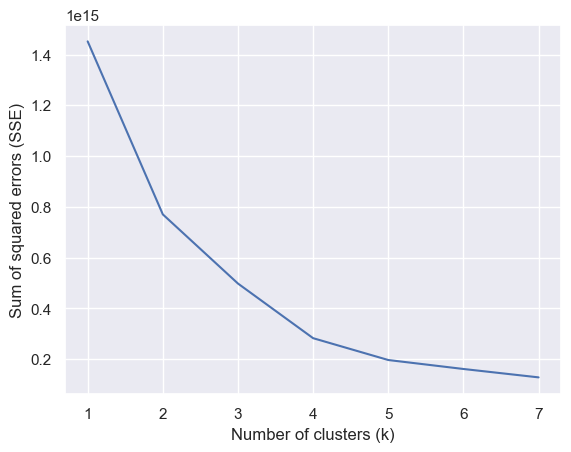

In [18]:

# create an empty list to store SSE values for each k value
sse = []
# try k values from 1 to 5
for k in range(1, 8):
    kmeans = KMeans(n_clusters=k, random_state=42,n_init='auto')
    kmeans.fit(coords)
    sse.append(kmeans.inertia_)

# plot SSE values for each k value
plt.plot(range(1, len(sse)+1), sse)
plt.xlabel('Number of clusters (k)')
plt.ylabel('Sum of squared errors (SSE)')
plt.show()



In [53]:

# # Create an HDBSCAN object and fit the data
# clusterer = hdbscan.HDBSCAN(min_cluster_size=50, min_samples=50, metric='euclidean',cluster_selection_epsilon=0.5)
# clusterer.fit(coords)

# # Get the labels and number of clusters
# labels = clusterer.labels_
# n_clusters = len(set(labels)) - (1 if -1 in labels else 0)

# # Add the cluster labels to the original DataFrame
# df['Cluster'] = labels

# # Create a color map with 10 colors
# colored = plt.cm.get_cmap('tab10', n_clusters)
# colors = colored(range(len(df)))

/var/folders/9l/7vfj4byj1msbc0qsc644jv_r0000gn/T/ipykernel_64124/1410978217.py:13: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colored = plt.cm.get_cmap('tab10', n_clusters)


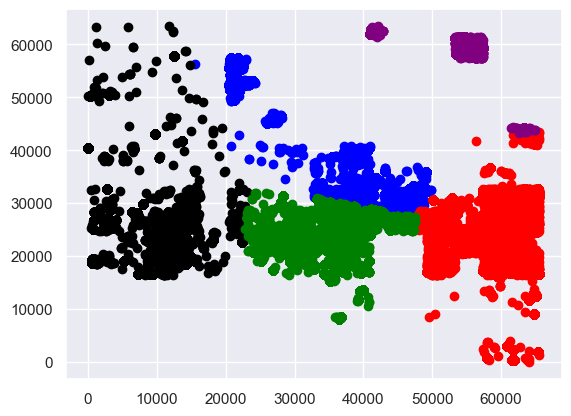

In [66]:
k = 5
kmeans = KMeans(n_clusters=k,n_init='auto',init='k-means++')
kmeans.fit(coords)
df['Cluster'] = kmeans.labels_
# plot the scatter plot for the clusters
colors = ['blue','red','black','purple','green','orange']
for i in range(k):
    plt.scatter(df[df['Cluster']==i]['Coords'].apply(lambda x: x[0]), 
                df[df['Cluster']==i]['Coords'].apply(lambda x: x[1]), 
                color=colors[i])

In [75]:
import math
from collections import Counter
# Define a function to calculate entropy
def entropy(s):
    p, lns = Counter(s), float(len(s))
    return -sum(count/lns * math.log(count/lns, 2) for count in p.values())

# Calculate entropy of IP address for each cluster
for i in range(k):
    cluster_i = df[df['Cluster'] == i]['Src IP']
    vc = pd.Series(cluster_i).value_counts(normalize=True, sort=False)
    base = np.e
    entropy = -(vc * np.log(vc)/np.log(base)).sum()
#     ip_entropy = entropy(cluster_i['Src IP'])
    print(f"Entropy of IP address for Cluster {i}: {entropy}")

Entropy of IP address for Cluster 0: 4.7117279020734735
Entropy of IP address for Cluster 1: 5.505250541090386
Entropy of IP address for Cluster 2: 4.191930703682249
Entropy of IP address for Cluster 3: 3.6780206582551576
Entropy of IP address for Cluster 4: 4.907073073017354


/opt/homebrew/lib/python3.11/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


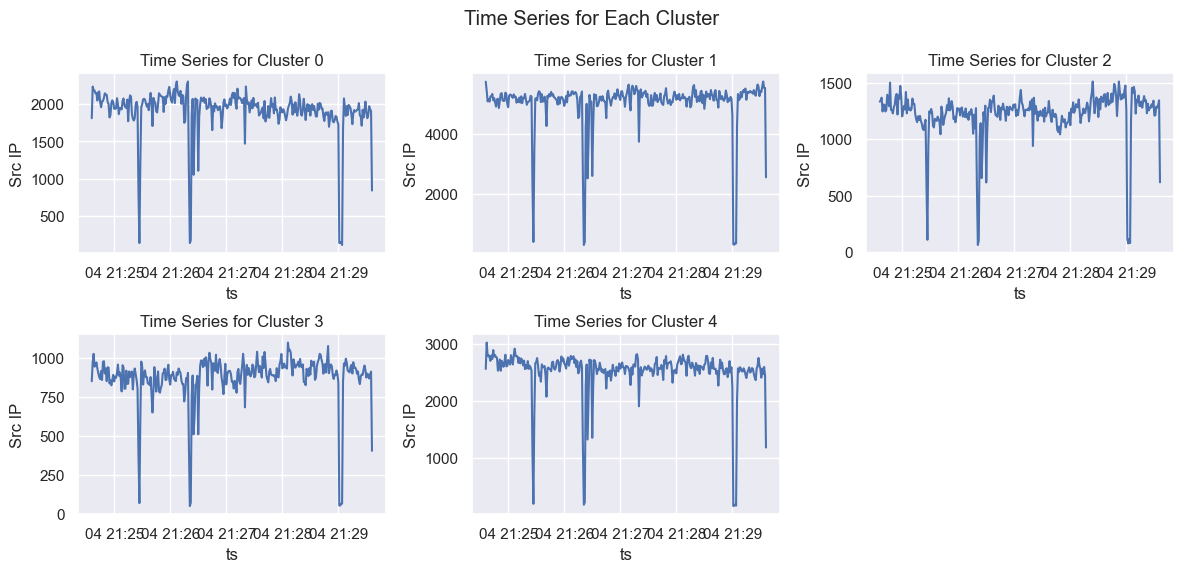

In [79]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define the dimensions of the grid
nrows = 3
ncols = 3

# Create the subplots
fig, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=(12,8))

# Flatten the axs array
axs = axs.flatten()

# Plot the time series for each cluster in a subplot
for i in range(k):
    cluster_i = df[df['Cluster'] == i]
    cluster_i_ts = cluster_i['Src IP'].resample('1S').count()
    sns.lineplot(data=cluster_i_ts, ax=axs[i])
    axs[i].set_title(f'Time Series for Cluster {i}')

# Remove the remaining subplots from the grid
for i in range(k, nrows*ncols):
    fig.delaxes(axs[i])

# Adjust the layout and spacing of the subplots
fig.tight_layout()
fig.subplots_adjust(top=0.9)
plt.suptitle('Time Series for Each Cluster')
plt.show()


In [89]:
 zeek_df.columns

Index(['Src IP', 'Coords', 'Cluster'], dtype='object')

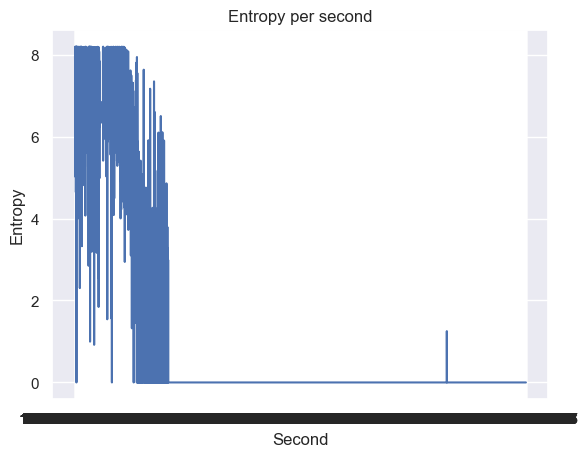

In [92]:
from scipy.stats import entropy as entr

# Calculate the entropy for each second
entropy_per_sec = zeek_df.groupby(['Src IP']).resample('S').size().groupby(level=0).apply(lambda x: entr(x, base=2))

# Plot the entropy values
plt.plot(entropy_per_sec.index, entropy_per_sec.values)
plt.title('Entropy per second')
plt.xlabel('Second')
plt.ylabel('Entropy')
plt.show()

In [ ]:
# # Reshape the dataframe to have seconds as rows and Src IPs as columns
# stacked = zeek_df.groupby(['Src IP']).resample('S').size().unstack()

# # Plot a stacked bar chart for each second
# for sec, data in stacked.iterrows():
#     plt.figure()
#     plt.title(f'Second: {sec}')
#     data.plot(kind='bar', stacked=True)
#     plt.show()

In [ ]:
x = zeek_df[-1000:]
len(x)

KeyboardInterrupt: 

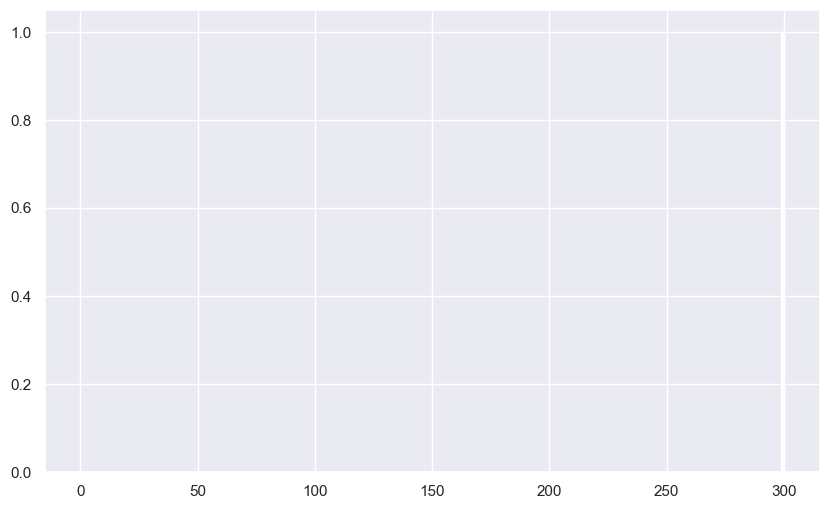

In [105]:

x = zeek_df[-1000:]
# Get the top 5 source IP addresses
freq_table = x['Src IP'].value_counts()
top_ips = list(freq_table[:5].keys())

# Filter the data to include only the top 5 IP addresses
top_df = x[x['Src IP'].isin(top_ips)]

# Group the data by second and source IP, and count the number of unique IP addresses
grouped_df = top_df.groupby([pd.Grouper(freq='1s'), 'Src IP'])['Src IP'].nunique()

# Convert the grouped data to a pivot table with source IP addresses as columns and seconds as the index
pivot_table = grouped_df.unstack(level='Src IP')


# Plot a stacked bar chart
pivot_table.plot(kind='bar', stacked=True, figsize=(10, 6), ylabel='Count of Distinct IPs', xlabel='Second', title='Top 5 Source IPs')
plt.legend(title='Source IP', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

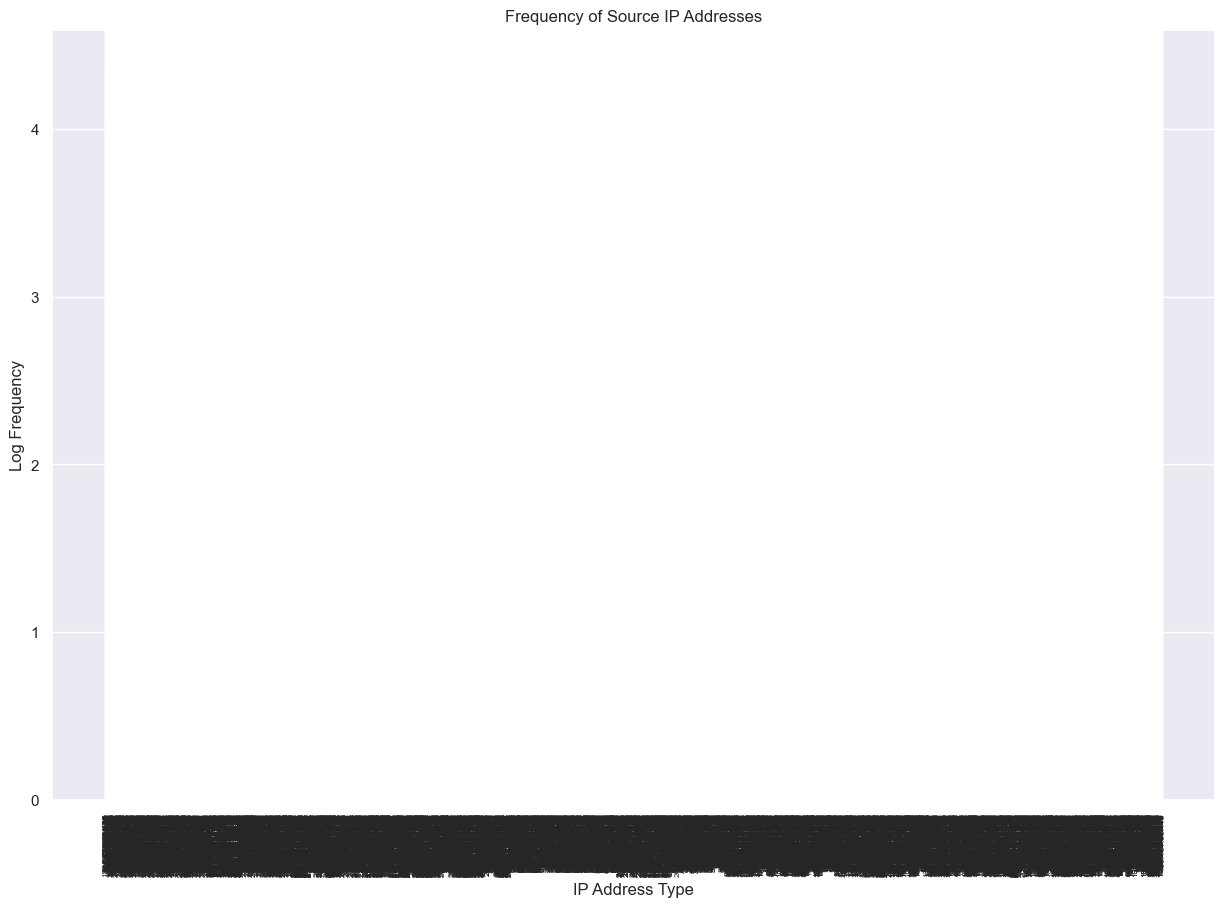